# Exercises

## Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

- 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

- 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

- 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

- 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

- 5. Run through steps 2-4 using a different max_depth value.

- 6. Which model performs better on your in-sample data?

- 7. Which model performs best on your out-of-sample data, the validate set?

In [112]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import prepare
import acquire

In [ ]:
# df = pd.read_csv('titanic_df.csv')

In [7]:
# df = acquire.get_titanic_data()
# Acquire Step
df = acquire.get_titanic_data()

In [ ]:
# df = data('titanic')

In [8]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


def clean_data(df):
    '''
    This function will drop any duplicate observations, 
    drop ['deck', 'embarked', 'class', 'age'], fill missing embark_town with 'Southampton'
    and create dummy vars from sex and embark_town. 
    '''
    df = df.drop_duplicates()
    df = df.drop(columns=['deck', 'embarked', 'class', 'age'])
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    return df

def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on survived.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.survived)
    return train, validate, test

In [9]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [10]:
df.tail()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
886,886,0,2,male,27.0,0,0,13.00,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.00,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.45,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.00,C,First,C,Cherbourg,1
890,890,0,3,male,32.0,0,0,7.75,Q,Third,NaN,Queenstown,1


df = clean_data(df)

def prep_titanic_data(df):
    '''
    This function takes in a df and will drop any duplicate observations, 
    drop ['deck', 'embarked', 'class', 'age'], fill missing embark_town with 'Southampton'
    create dummy vars from sex and embark_town, and perform a train, validate, test split. 
    Returns train, validate, and test DataFrames
    '''
    df = clean_data(df)
    train, validate, test = split_data(df)
    return train, validate, test

train, validate, test = prep_titanic_data(df)
train.info()

In [11]:
df.survived.nunique()

2

In [12]:
df.nunique()

passenger_id    891
survived          2
pclass            3
sex               2
age              88
sibsp             7
parch             7
fare            248
embarked          3
class             3
deck              7
embark_town       3
alone             2
dtype: int64

# What is your baseline prediction? What is your baseline accuracy? 
### remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

baseline:  survived = no

In [ ]:
# convert column names to lowercase, replace '.' in column names with '_'
# df.columns = [col.lower().replace('.', '_') for col in df]

In [13]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [14]:
df.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [15]:
#df.replace([('1st class', 1), ('2nd class', 2), ('3rd class', 3), ('man', 0), ('woman', 1), ('yes', 1), ('no', 0)])
df = df.replace(['1st class', '2nd class', '3rd class', 'man', 'women', 'yes', 'no', 'adults', 'child'], [1, 2, 3, 0, 1, 1, 0, 1, 0])

In [16]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [18]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [19]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='survived', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [20]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [21]:
clf = clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'male'

In [22]:
clf

DecisionTreeClassifier(max_depth=3, random_state=123)

import graphviz
from graphviz import Graph

dot_data = export_graphviz(clf, feature_names= X_train.columns, class_names=clf.classes_, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

In [23]:
y_pred = clf.predict(X_train)
y_pred[0:5]

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

In [ ]:
confusion_matrix(y_train, y_pred)

In [ ]:
y_train.value_counts()

In [ ]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

In [ ]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

dot_data = export_graphviz(clf, feature_names= X_train.columns, 
                           class_names=('Yes', 'No'), rounded=True, 
                           filled=True, out_file=None)

### Decision Tree Exercises

In [24]:

# Acquire Step
df = acquire.get_titanic_data()
df.head(2)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


In [25]:

# Reduce obvious noise
df = df.set_index("passenger_id")
df = df.drop(columns=["class", "embarked"])

In [26]:

# Drop deck because there are far too many nulls
df = df.drop(columns=["deck"])

In [27]:

# Let's fill embark_town with the most common observation
df.embark_town = df.embark_town.fillna(value=df.embark_town.mode())

In [28]:
# Looking at the distribution of values, it appears that no age subgroup is very close to the population
# If we needed to be more certain, we could perform hypothesis testing
# It looks like there's nothing wildly different about the no age group compared to the population
# So we'll impute using the median age
df.age = df.age.fillna(value=df.age.median())

In [29]:
# Time to encode the encodeable!
dummy_df = pd.get_dummies(df[['sex','embark_town']], dummy_na=False, drop_first=[True, True])

# Drop the original columns we encoded
df = df.drop(columns=["sex", "embark_town"])

# Stitch the df and the dummy_df together again
df = pd.concat([df, dummy_df], axis=1)
df.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
passenger_id,,,,,,,,,,
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1


In [30]:
# Time to split!
train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)

In [31]:
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [32]:
# modeling
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.62


In [33]:

# Make the model
tree1 = DecisionTreeClassifier(max_depth=1, random_state=123)

# Fit the model (on train and only train)
tree1 = tree1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree1.predict(X_train)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)

Tree of 1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.820433,0.760000,0.799197,0.790217,0.797255
recall,0.863192,0.696335,0.799197,0.779764,0.799197
f1-score,0.841270,0.726776,0.799197,0.784023,0.797358
support,307.000000,191.000000,0.799197,498.000000,498.000000


# Exercises

## Continue working in your model file with titanic data to do the following:

- 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

- 2. Evaluate your results using the model score, confusion matrix, and classification report.

- 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

- 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

- 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

### After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [34]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [35]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [36]:
# Time to split!
train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)

In [37]:
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [38]:
# create a baseline using .mode()

baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.62


In [39]:
# create the random forest object
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=1, 
                            random_state=123)

In [40]:
# fit the random forest
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, random_state=123)

In [41]:
# Evaluate importance, or weight, of each feature.
print(rf.feature_importances_)

[0.2  0.06 0.04 0.04 0.12 0.11 0.39 0.   0.04]


In [42]:
# make predictions
y_pred = rf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 1, 1])

In [43]:
# estimate probability
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.64575062, 0.35424938],
       [0.68303155, 0.31696845],
       [0.68913723, 0.31086277],
       [0.40559605, 0.59440395],
       [0.42322053, 0.57677947]])

In [44]:
# Compute the Accuracy
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.78


In [45]:
# Create a confusion matrix
print(confusion_matrix(y_train, y_pred))

[[280  27]
 [ 82 109]]


In [46]:
# Create a classificaiton report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       307
           1       0.80      0.57      0.67       191

    accuracy                           0.78       498
   macro avg       0.79      0.74      0.75       498
weighted avg       0.78      0.78      0.77       498



In [47]:
# Evaluate on Out-of-Sample data

print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.76


In [48]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,280,27
1,82,109


In [49]:
# solution example
# Make the model
forest1 = RandomForestClassifier(max_depth=1, random_state=123)

# Fit the model (on train and only train)
tree1 = forest1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = forest1.predict(X_train)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)

Tree of 1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.773481,0.801471,0.781124,0.787476,0.784216
recall,0.912052,0.570681,0.781124,0.741366,0.781124
f1-score,0.837070,0.666667,0.781124,0.751868,0.771715
support,307.000000,191.000000,0.781124,498.000000,498.000000


# KNN Exercises

### Continue working in your model file with the titanic dataset.

- 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

- 2. Evaluate your results using the model score, confusion matrix, and classification report.

- 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

- 4. Run through steps 2-4 setting k to 10

- 5. Run through setps 2-4 setting k to 20

- 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

- 7. Which model performs best on our out-of-sample data from validate?



In [50]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from pydataset import data

In [91]:
df

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
passenger_id,,,,,,,,,,
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,1,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,1
888,0,3,28.0,1,2,23.4500,0,0,0,1


In [94]:
train.shape

(498, 10)

In [95]:
validate.shape

(214, 10)

In [92]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
passenger_id,,,,,,,,,,
583,0,1,36.0,0,0,40.1250,1,1,0,0
165,1,3,9.0,0,2,20.5250,0,1,0,1
50,0,3,7.0,4,1,39.6875,0,1,0,1
259,1,2,50.0,0,1,26.0000,0,0,0,1
306,1,1,28.0,0,0,110.8833,1,0,0,0


In [52]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [53]:
# Time to split!
train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)

In [54]:
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [55]:
# weights = ['uniform', 'distance']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [56]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
# predict on X_train
y_pred = knn.predict(X_train)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,

In [58]:
# calculate probabilities (if you need them)
y_pred_proba = knn.predict_proba(X_train)

In [59]:
y_pred_proba

array([[0.6, 0.4],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.8, 0.2],
       [1. , 0. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.4, 0.6],
       [1. , 0. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4,

In [60]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.79


In [61]:
print(confusion_matrix(y_train, y_pred))

[[256  51]
 [ 52 139]]


In [62]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.831169,0.731579,0.793173,0.781374,0.792973
recall,0.833876,0.727749,0.793173,0.780812,0.793173
f1-score,0.832520,0.729659,0.793173,0.781090,0.793069
support,307.000000,191.000000,0.793173,498.000000,498.000000


In [63]:
# predict on X_validate 
y_pred = knn.predict(X_validate)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0])

In [64]:
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on validate set: 0.71


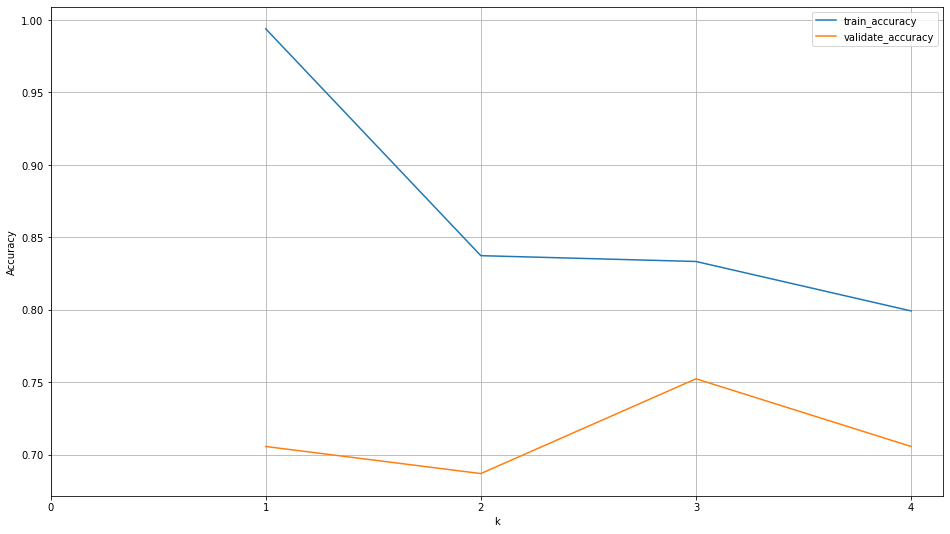

In [101]:
metrics = []

# loop through different values of k
for k in range(1, 5):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))

plt.ylabel('Accuracy')
plt.xticks(np.arange(0,5,1))
plt.grid()

In [66]:
results

,k,train_accuracy,validate_accuracy
0,1,0.993976,0.705607
1,2,0.837349,0.686916
2,3,0.833333,0.752336
3,4,0.799197,0.705607


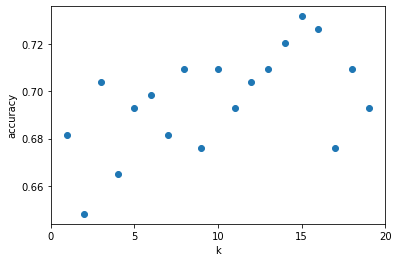

In [67]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

In [68]:
# weights = ['uniform', 'distance']
# setting to 10
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [69]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [70]:
# predict on X_train
y_pred = knn.predict(X_train)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [71]:
# calculate probabilities (if you need them)
y_pred_proba = knn.predict_proba(X_train)
y_pred_proba

array([[0.3, 0.7],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.5, 0.5],
       [0.2, 0.8],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.7, 0.3],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ],
       [0.4, 0.6],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.5, 0.5],
       [0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ],
       [0.4, 0.6],
       [0.7, 0.3],
       [0.5, 0.5],
       [0.9, 0.1],
       [0.6, 0.4],
       [0.5, 0.5],
       [0.7, 0.3],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.1, 0.9],
       [0.4, 0.6],
       [0.5, 0.5],
       [0.7, 0.3],
       [0.5, 0.5],
       [0.8, 0.2],
       [0.5, 0.5],
       [1. , 0. ],
       [0.9, 0.1],
       [0.6, 0.4],
       [0.7, 0.3],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.1, 0.9],
       [0.6, 0.4],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.4,

In [72]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.75


In [73]:
print(confusion_matrix(y_train, y_pred))

[[276  31]
 [ 95  96]]


In [74]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.743935,0.755906,0.746988,0.749920,0.748526
recall,0.899023,0.502618,0.746988,0.700820,0.746988
f1-score,0.814159,0.603774,0.746988,0.708966,0.733469
support,307.000000,191.000000,0.746988,498.000000,498.000000


In [75]:
# predict on X_validate 
y_pred = knn.predict(X_validate)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0])

In [76]:
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on validate set: 0.71


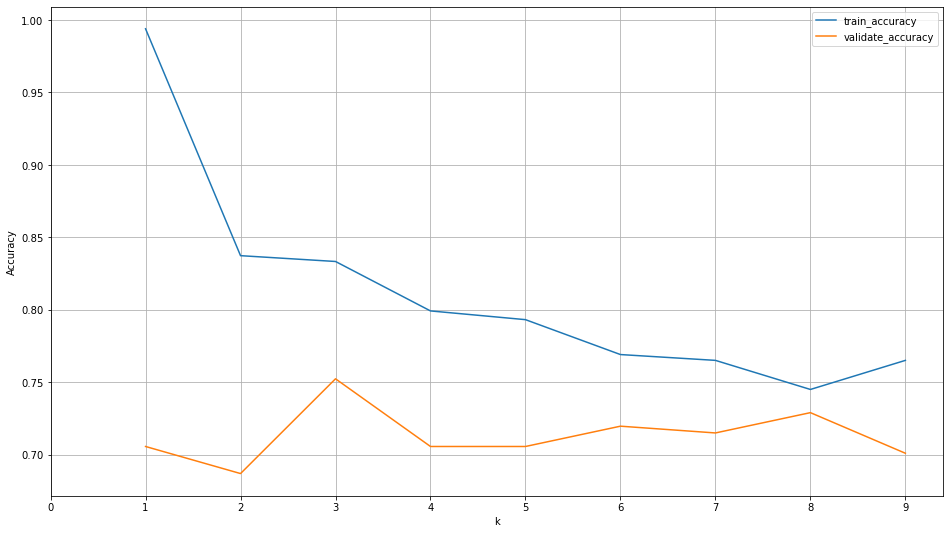

In [99]:
metrics = []

# loop through different values of k
for k in range(1, 10):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))

plt.ylabel('Accuracy')
plt.xticks(np.arange(0,10,1))
plt.grid()

In [78]:
results

,k,train_accuracy,validate_accuracy
0,1,0.993976,0.705607
1,2,0.837349,0.686916
2,3,0.833333,0.752336
3,4,0.799197,0.705607
4,5,0.793173,0.705607
5,6,0.769076,0.719626
6,7,0.765060,0.714953
7,8,0.744980,0.728972
8,9,0.765060,0.700935


In [79]:
# weights = ['uniform', 'distance']
# change to 20
knn = KNeighborsClassifier(n_neighbors=20, weights='uniform')

In [80]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [81]:
# predict on X_train
y_pred = knn.predict(X_train)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [82]:
# calculate probabilities (if you need them)
y_pred_proba = knn.predict_proba(X_train)
y_pred_proba

array([[0.55, 0.45],
       [0.4 , 0.6 ],
       [0.7 , 0.3 ],
       [0.6 , 0.4 ],
       [0.3 , 0.7 ],
       [0.55, 0.45],
       [0.6 , 0.4 ],
       [0.75, 0.25],
       [0.45, 0.55],
       [0.6 , 0.4 ],
       [0.6 , 0.4 ],
       [0.75, 0.25],
       [0.55, 0.45],
       [0.6 , 0.4 ],
       [0.55, 0.45],
       [0.7 , 0.3 ],
       [0.95, 0.05],
       [0.45, 0.55],
       [0.65, 0.35],
       [0.85, 0.15],
       [0.6 , 0.4 ],
       [1.  , 0.  ],
       [0.45, 0.55],
       [0.55, 0.45],
       [0.5 , 0.5 ],
       [0.9 , 0.1 ],
       [0.45, 0.55],
       [0.55, 0.45],
       [0.55, 0.45],
       [0.7 , 0.3 ],
       [0.8 , 0.2 ],
       [0.75, 0.25],
       [0.8 , 0.2 ],
       [0.2 , 0.8 ],
       [0.6 , 0.4 ],
       [0.7 , 0.3 ],
       [0.65, 0.35],
       [0.5 , 0.5 ],
       [0.75, 0.25],
       [0.55, 0.45],
       [0.85, 0.15],
       [0.9 , 0.1 ],
       [0.55, 0.45],
       [0.6 , 0.4 ],
       [0.45, 0.55],
       [0.75, 0.25],
       [0.45, 0.55],
       [0.85,

In [83]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.72


In [84]:
print(confusion_matrix(y_train, y_pred))

[[269  38]
 [103  88]]


In [85]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.723118,0.698413,0.716867,0.710765,0.713643
recall,0.876221,0.460733,0.716867,0.668477,0.716867
f1-score,0.792342,0.555205,0.716867,0.673773,0.701392
support,307.000000,191.000000,0.716867,498.000000,498.000000


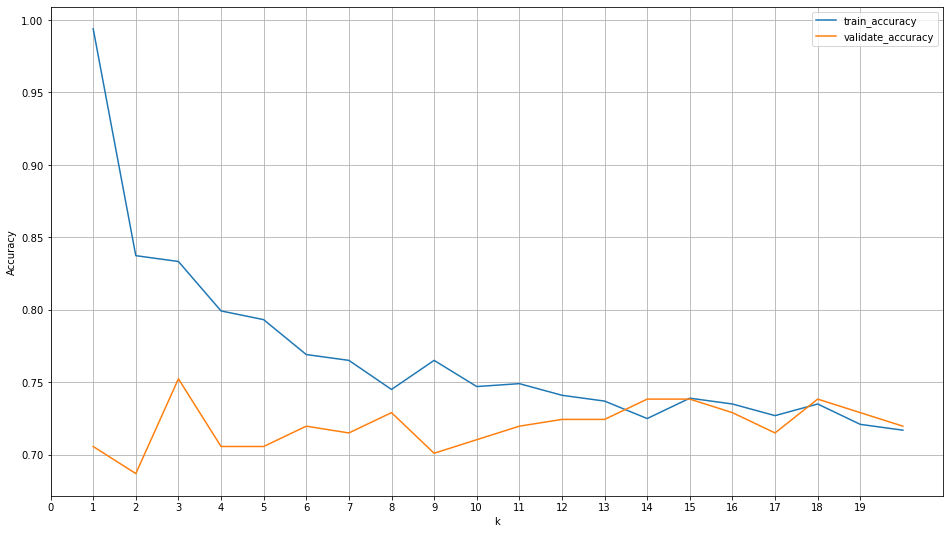

In [97]:
metrics = []

# loop through different values of k
for k in range(1, 21):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remember only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))

plt.ylabel('Accuracy')
plt.xticks(np.arange(0,20,1))
plt.grid()

In [87]:
results

,k,train_accuracy,validate_accuracy
0,1,0.993976,0.705607
1,2,0.837349,0.686916
2,3,0.833333,0.752336
3,4,0.799197,0.705607
4,5,0.793173,0.705607
5,6,0.769076,0.719626
6,7,0.765060,0.714953
7,8,0.744980,0.728972
8,9,0.765060,0.700935
9,10,0.746988,0.710280


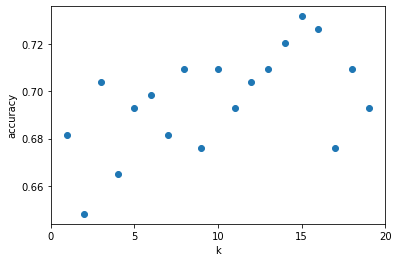

In [88]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

In [90]:
print(rf.feature_importances_)

[0.2  0.06 0.04 0.04 0.12 0.11 0.39 0.   0.04]


In [105]:
# This gives you a list of tuples, where each tuple contains a unique combination of features (edited) 
import itertools

features = ["this", "that", "the other"]
            
possible_combinations = []
            
for i in range(2, len(features) + 1):
    possible_combinations.extend(list(itertools.combinations(features, i)))

possible_combinations

[('this', 'that'),
 ('this', 'the other'),
 ('that', 'the other'),
 ('this', 'that', 'the other')]

In [106]:
# this is a way to model through all possible combinations of features
for combination in possible_combinations:
    features = list(combination)
    model = model.fit(X_train[[features]])
    # then continue on with your model evaluation

NameError: name 'model' is not defined

# Logistic Regression Exercises

### In these exercises, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

### For all of the models you create, choose a threshold that optimizes for accuracy.

- 1. Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

- 2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

- 3. Try out other combinations of features and models.

- 4. Use you best 3 models to predict and evaluate on your validate sample.

- 5. Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

In [109]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# import logistic_regression_util

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [154]:
df = prepare.prep_titanic(acquire.get_titanic_data())

In [156]:
df

(     passenger_id  survived  pclass     sex        age  sibsp  parch  \
 583           583         0       1    male  36.000000      0      0   
 337           337         1       1  female  41.000000      0      0   
 50             50         0       3    male   7.000000      4      1   
 218           218         1       1  female  32.000000      0      0   
 31             31         1       1  female  29.916875      1      0   
 ..            ...       ...     ...     ...        ...    ...    ...   
 313           313         0       3    male  28.000000      0      0   
 636           636         0       3    male  32.000000      0      0   
 222           222         0       3    male  51.000000      0      0   
 485           485         0       3  female  29.916875      3      1   
 553           553         1       3    male  22.000000      0      0   
 
          fare embarked  class  embark_town  alone  Q  S  
 583   40.1250        C  First    Cherbourg      1  0  0  
 337

In [115]:
# get the titanic data
train, validate, test = prepare.prep_titanic(acquire.get_titanic_data())

In [157]:
# check on the shape
train.shape, validate.shape, test.shape

((497, 14), (214, 14), (178, 14))

In [158]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S
583,583,0,1,male,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0
337,337,1,1,female,41.000000,0,0,134.5000,C,First,Cherbourg,1,0,0
50,50,0,3,male,7.000000,4,1,39.6875,S,Third,Southampton,0,0,1
218,218,1,1,female,32.000000,0,0,76.2917,C,First,Cherbourg,1,0,0
31,31,1,1,female,29.916875,1,0,146.5208,C,First,Cherbourg,0,0,0


In [159]:
x_cols = ['pclass', 'age', 'alone', 'fare']
y_col = 'survived'

X_train, y_train = train[x_cols], train[y_col]
X_validate, y_validate = validate[x_cols], validate[y_col]
X_test, y_test = test[x_cols], test[y_col]

In [160]:
logit = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')


In [161]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 99}, random_state=123)

In [162]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-1.03681768 -0.03113288 -0.71983106  0.00148408]]
Intercept: 
 [7.72944224]


In [163]:
y_pred = logit.predict(X_train)

In [164]:
y_pred_proba = logit.predict_proba(X_train)

In [165]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.38


In [166]:
print(confusion_matrix(y_train, y_pred))

[[  0 307]
 [  0 190]]


In [167]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       307
           1       0.38      1.00      0.55       190

    accuracy                           0.38       497
   macro avg       0.19      0.50      0.28       497
weighted avg       0.15      0.38      0.21       497



In [168]:
logit2 = LogisticRegression(C=.1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')


In [169]:
logit2.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight={0: 1, 1: 99}, random_state=123)

In [170]:
print('Coefficient: \n', logit2.coef_)
print('Intercept: \n', logit2.intercept_)

Coefficient: 
 [[-0.9509136  -0.02953092 -0.63871612  0.00242023]]
Intercept: 
 [7.38904451]


In [171]:
y_pred2 = logit2.predict(X_train)

In [172]:
y_pred_proba2 = logit2.predict_proba(X_train)

In [173]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.38


In [174]:
print(confusion_matrix(y_train, y_pred2))

[[  0 307]
 [  0 190]]


In [134]:
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       307
           1       0.38      1.00      0.55       190

    accuracy                           0.38       497
   macro avg       0.19      0.50      0.28       497
weighted avg       0.15      0.38      0.21       497



In [135]:
# make predictions

y_pred1 = logit.predict(X_validate)
y_pred2 = logit2.predict(X_validate)


print("Model 1: solver = lbfgs, c = 1")

# accuracy of model 1
print('Accuracy: {:.2f}'.format(logit.score(X_validate, y_validate)))

# confusion matrix of model 1
print(confusion_matrix(y_validate, y_pred1))

# classification report of model 1
print(classification_report(y_validate, y_pred1))

print("Model 2: solver = lbfgs, c = .1")

# accuracy of model 2
print('Accuracy: {:.2f}'.format(logit2.score(X_validate, y_validate)))

# confusion matrix of model 2
print(confusion_matrix(y_validate, y_pred2))

# classification report of model 2
print(classification_report(y_validate, y_pred2))

Model 1: solver = lbfgs, c = 1
Accuracy: 0.38
[[  0 132]
 [  0  82]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.38      1.00      0.55        82

    accuracy                           0.38       214
   macro avg       0.19      0.50      0.28       214
weighted avg       0.15      0.38      0.21       214

Model 2: solver = lbfgs, c = .1
Accuracy: 0.38
[[  0 132]
 [  0  82]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.38      1.00      0.55        82

    accuracy                           0.38       214
   macro avg       0.19      0.50      0.28       214
weighted avg       0.15      0.38      0.21       214



In [136]:
y_pred = logit.predict(X_test)
y_pred_proba = logit.predict_proba(X_test)

print("Model 1: solver = lbfgs, c = 1")

print('Accuracy: {:.2f}'.format(logit.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

Model 1: solver = lbfgs, c = 1
Accuracy: 0.38
[[  0 110]
 [  0  68]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.38      1.00      0.55        68

    accuracy                           0.38       178
   macro avg       0.19      0.50      0.28       178
weighted avg       0.15      0.38      0.21       178



In [137]:
# create array of probabilities of being versicolor (versicolor == 1)

y_pred_proba = np.array([i[1] for i in y_pred_proba])

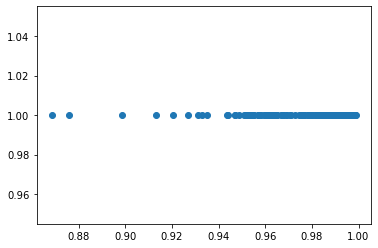

In [138]:
fig = plt.figure()
ax = fig.add_subplot(111)

# scatter plot where x is the probabilities and y is the class (0, 1)
ax.scatter(y_pred_proba, y_pred)